<a href="https://colab.research.google.com/github/SaiVamshiKatkuri/MLnow_2.0/blob/main/3_2_Univariate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Topic**: `Univariate Linear Regression`

[Link to download the Dataset](https://www.kaggle.com/mustafaali96/weight-height?select=weight-height.csv)

**Date Created** :June 11,2021

**AUTHOR**: Sai Vamshi Katkuri
[Assessment Repository](https://github.com/SaiVamshiKatkuri/MLnow_2.0)

**Reach out** :[Email](https://mail.google.com/mail/u/0/?tab=rm&ogbl#inbox) | [Linkedin](https://www.linkedin.com/in/katkuri-sai-vamshi-2209281a8/) | [Github](https://github.com/SaiVamshiKatkuri)





## EDA and Univariate Modelling

## SETUP

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
cd '/content/drive/MyDrive/Datasets'

/content/drive/MyDrive/Datasets


In [3]:
ls -a

student-mat.csv  student-por.csv  univariate_MathData_2.csv  w-h.csv


###We're  going to work on `w-h.csv (Weight-Height)`

## Data Preprocessing

In [4]:
# Import necessary libraries
import pandas as pd                    # For handling csv files(constructs dataframes)
import numpy as np                     # For scientific computations as well as hanlding arrays,vectors,tensors
import matplotlib.pyplot as plt        # For visualisation of Data
import seaborn as sns                  # For visualisation with different plots 
import tensorflow as tf                # Framework


In [5]:
dataset=pd.read_csv('w-h.csv')         # Reading the csv and creates a dataframe


In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  5000 non-null   int64  
 1   Gender      5000 non-null   object 
 2   Height      5000 non-null   float64
 3   Weight      5000 non-null   float64
dtypes: float64(2), int64(1), object(1)
memory usage: 156.4+ KB


In [7]:
dataset.shape                         # Shape of the Dataset

(5000, 4)

In [8]:
dataset=dataset.iloc[0:500,0:]        # Adjusting the samples from 5000 to 500

In [9]:
dataset.head(10)                      # Prints 10 rows from the top

,Unnamed: 0,Gender,Height,Weight
0,0,Male,73.847017,241.893563
1,1,Male,68.781904,162.310473
2,2,Male,74.110105,212.740856
3,3,Male,71.730978,220.042470
4,4,Male,69.881796,206.349801
5,5,Male,67.253016,152.212156
6,6,Male,68.785081,183.927889
7,7,Male,68.348516,167.971110
8,8,Male,67.018950,175.929440
9,9,Male,63.456494,156.399676


In [10]:
dataset.tail(10)                         # Prints ten rows from the bottom

,Unnamed: 0,Gender,Height,Weight
490,490,Male,68.792984,174.489486
491,491,Male,68.445747,183.783383
492,492,Male,69.201578,188.103506
493,493,Male,69.426017,176.193430
494,494,Male,69.606225,194.200712
495,495,Male,72.881707,194.199509
496,496,Male,62.178331,145.898842
497,497,Male,68.874707,191.833709
498,498,Male,71.080084,209.853554
499,499,Male,72.182534,201.261464


In [11]:
dataset.columns = ['S.no','Gender','Height','Weight']              #  Renaming columns

In [12]:
print(f"There are {len(dataset.columns)} columns in the dataset")  # Finding number of  cols
print(dataset.columns)

There are 4 columns in the dataset
Index(['S.no', 'Gender', 'Height', 'Weight'], dtype='object')


In [13]:
dataset=dataset.drop(['S.no','Gender'],axis=1)                     # Dropping Unnecessary cols

In [14]:
dataset.iloc[:,1:].describe()                                      # Basic analysis over the dataset

,Weight
count,500.000000
mean,187.141335
std,19.305476
min,135.655876
25%,173.027386
50%,186.885972
75%,200.038625
max,241.893563


In [15]:
dataset.isnull().sum()                                              # Checking Null values

Height    0
Weight    0
dtype: int64

## Data Visualisation

**Scatter Plot**

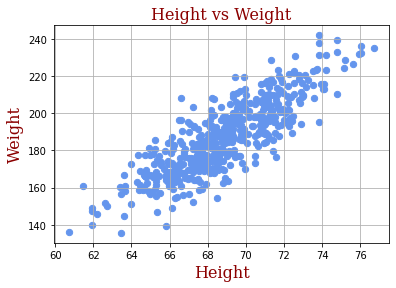

<Figure size 2880x2880 with 0 Axes>

In [16]:
plt.grid(True)
font = {'family': 'serif',
        'color':  'darkred',
        'weight': 'normal',
        'size': 16,
        }
plt.scatter(dataset['Height'],dataset['Weight'],s=40,color='cornflowerblue')
plt.title('Height vs Weight',fontdict=font)
plt.xlabel('Height',fontdict=font)
plt.ylabel('Weight',fontdict=font)
plt.figure(figsize=(40,40))
plt.show()

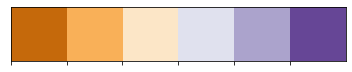

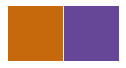

In [17]:
sns.palplot(sns.color_palette('PuOr')) #Purple to Orange colors
pal = sns.color_palette('PuOr', 6) #print 6 color shades from Purple to Orange
pal.as_hex() #set hex code values for colors

import matplotlib.pyplot as plt
plt.style.use(['seaborn'])
sns_colors = ['#c6690c', '#664697'] #orange Purple hex codes
sns.set_palette(sns_colors) #set the palette as sns_colors 
sns.palplot(sns.color_palette(sns_colors)) #plot the color codes

**Pair Plot**

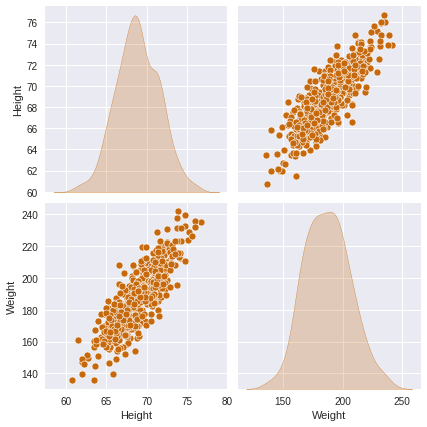

In [18]:

sns.pairplot(dataset,x_vars=['Height','Weight'],y_vars=['Height','Weight'],diag_kind='kde',palette="hls",height=3)


**Box Plot**

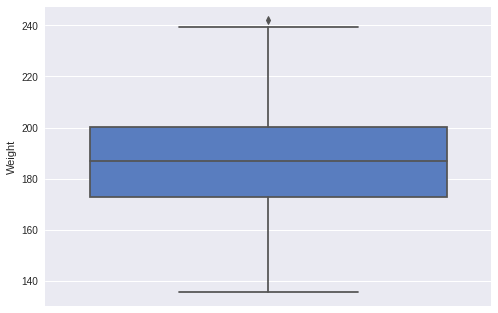

In [19]:

sns.boxplot(y=dataset['Weight'],palette='muted')

**Violin Plot**

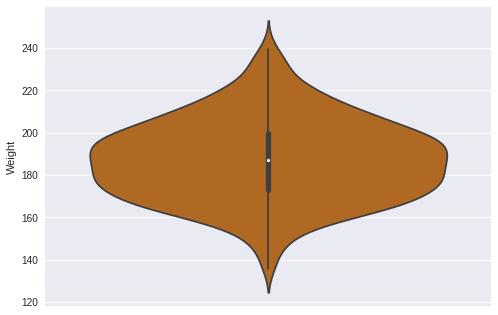

In [20]:
sns.violinplot(y=dataset["Weight"])

In [21]:
dataset.corr()                                          # Finding the correlation b/w variables

,Height,Weight
Height,1.000000,0.837903
Weight,0.837903,1.000000


**Heat Map**

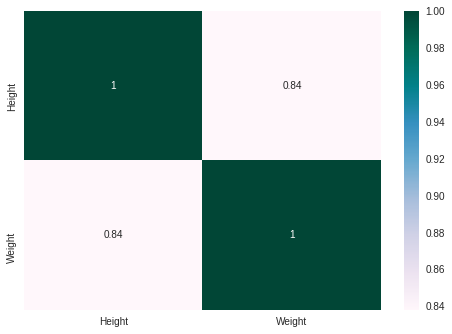

In [22]:
sns.heatmap(dataset.corr(),annot=True,cmap="PuBuGn")

*There exists a positive correlation between the variables `Height` and `Weight`*

# Data Split

In [23]:
trainDataset = dataset.sample(frac=0.8, random_state=0)                                  # Dividing datasets into parts (80% and 20%)
testDataset = dataset.drop(trainDataset.index)


In [24]:
print(f'After split the number of samples in trainDataset {trainDataset.shape[0]}')      # Counting the samples
print(f'After split the number of samples in testDataset {testDataset.shape[0]}')

After split the number of samples in trainDataset 400
After split the number of samples in testDataset 100


In [25]:
trainFeatures = trainDataset.copy()
testFeatures = testDataset.copy()

print(trainFeatures.head())
print(testFeatures.head())

        Height      Weight
90   71.815420  201.620667
254  69.164381  196.892315
283  66.414882  155.194772
445  71.433376  216.634000
461  66.676781  183.197307
       Height      Weight
9   63.456494  156.399676
25  68.144033  192.343977
28  67.421242  175.213922
31  74.033808  212.910225
32  71.528216  195.032243


In [26]:
trainLabels = trainFeatures.pop('Weight')
testLabels = testFeatures.pop('Weight')

print(trainLabels.head())
print(testLabels.head())

90     201.620667
254    196.892315
283    155.194772
445    216.634000
461    183.197307
Name: Weight, dtype: float64
9     156.399676
25    192.343977
28    175.213922
31    212.910225
32    195.032243
Name: Weight, dtype: float64


In [27]:
print(trainLabels.describe())


count    400.000000
mean     186.853132
std       19.441716
min      135.655876
25%      172.746315
50%      186.346299
75%      199.938897
max      241.893563
Name: Weight, dtype: float64


### Training a Perceptron

In [28]:
model=tf.keras.models.Sequential()

In [29]:
model.add(tf.keras.layers.Dense(units=6, activation='relu'))   # Adding a hidden layer

In [30]:
model.add(tf.keras.layers.Dense(units=1))

In [31]:
model.compile(
    loss = 'mean_absolute_error', #minimizing the MAE loss
    optimizer = tf.keras.optimizers.Adam(0.001), #learning rate specified as 0.001
    # optimizer = 'adam', #takes the default learning rate
    metrics = ['mae', 'mse'] #meanSquare and meanAbsolute error metrics
)

In [32]:
numEpochs = 600
history = model.fit(x = trainFeatures, y = trainLabels, validation_data = (testFeatures, testLabels),epochs = numEpochs)

Epoch 1/600
13/13 [==============================] - 1s 16ms/step - loss: 165.4955 - mae: 165.4955 - mse: 27739.7266 - val_loss: 165.1302 - val_mae: 165.1302 - val_mse: 27590.2656
Epoch 2/600
13/13 [==============================] - 0s 3ms/step - loss: 162.2694 - mae: 162.2694 - mse: 26677.3359 - val_loss: 161.8706 - val_mae: 161.8706 - val_mse: 26520.6523
Epoch 3/600
13/13 [==============================] - 0s 4ms/step - loss: 158.9852 - mae: 158.9852 - mse: 25619.3496 - val_loss: 158.5372 - val_mae: 158.5372 - val_mse: 25448.8223
Epoch 4/600
13/13 [==============================] - 0s 4ms/step - loss: 155.6218 - mae: 155.6218 - mse: 24559.5078 - val_loss: 155.1275 - val_mae: 155.1275 - val_mse: 24375.5020
Epoch 5/600
13/13 [==============================] - 0s 3ms/step - loss: 152.1749 - mae: 152.1749 - mse: 23492.4629 - val_loss: 151.6315 - val_mae: 151.6315 - val_mse: 23299.1602
Epoch 6/600
13/13 [==============================] - 0s 4ms/step - loss: 148.6420 - mae: 148.6420 - mse:

In [33]:
print(history)

In [34]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 6)                 12        
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 7         
Total params: 19
Trainable params: 19
Non-trainable params: 0
_________________________________________________________________


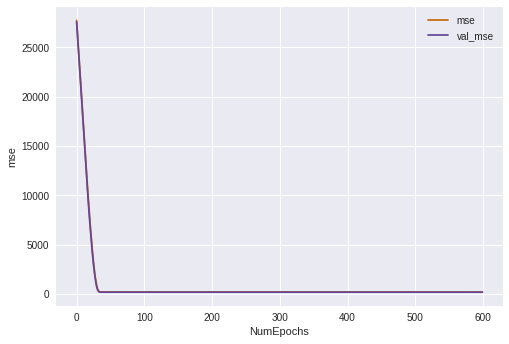

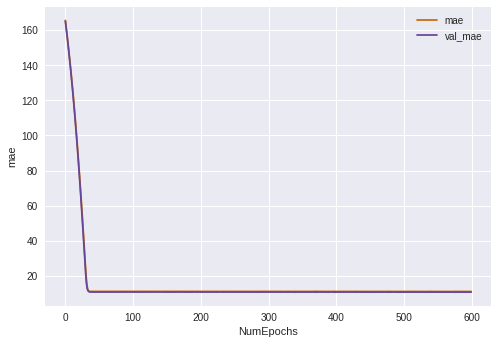

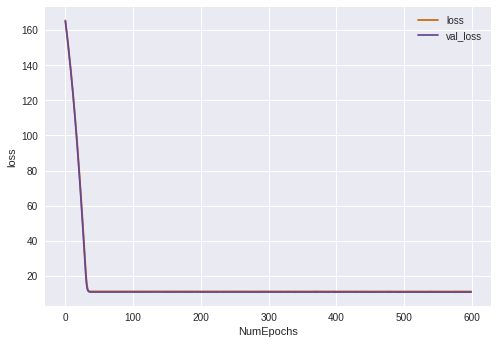

In [35]:
# tempString = 'mse'
def curvePlots(tempString):
  plt.plot(history.history[tempString])
  plt.plot(history.history[f'val_{tempString}'])
  plt.xlabel('NumEpochs')
  plt.ylabel(tempString)
  plt.legend([tempString, f'val_{tempString}'])
  plt.show()


curvePlots('mse')
curvePlots('mae')
curvePlots('loss')

In [36]:
model.predict([77.2])

array([[208.92967]], dtype=float32)

In [37]:
testPreds = model.predict(testFeatures)
testPreds_Array=testPreds.flatten() #array of all prediction values

In [38]:
print(len(testPreds_Array))
print(testPreds_Array)

100
[171.62805 184.35063 182.38889 200.33621 193.53572 178.00847 173.9288
 176.55107 195.28496 182.14351 191.48993 187.45961 188.47527 199.77255
 178.42174 186.54231 184.62321 176.46072 187.79077 185.94913 199.39005
 184.80533 194.01761 185.91713 191.56349 187.50102 178.00558 192.10736
 176.76839 181.88051 176.13898 184.44699 178.70825 184.62721 184.45024
 180.13864 184.73877 188.6519  196.98541 195.6162  205.52197 203.3408
 174.22014 190.26938 181.91342 186.8133  191.21387 184.58704 172.13713
 192.08347 175.63098 191.90971 195.51949 179.17316 184.05421 191.54575
 202.377   192.28368 187.58089 182.2671  194.18779 176.59364 191.88995
 194.11671 180.56882 190.48315 186.7274  190.7204  180.59991 187.00134
 193.99423 181.91661 185.10202 186.37755 184.73195 184.00044 181.96852
 178.02919 188.54604 191.05917 195.43399 178.34799 185.45486 183.7069
 181.5514  172.21455 187.28537 178.59859 186.88484 188.51689 197.42628
 194.69849 181.18303 185.25708 180.5993  186.6536  195.93059 176.99687
 192.

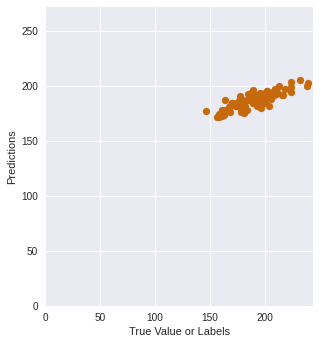

In [39]:
# prediciton plot --> how well is your model predicting across the actual labels

def predPlot(labels, predictions):
  plt.scatter(labels, predictions)
  plt.ylabel('Predictions')
  plt.xlabel('True Value or Labels')
  plt.axis('equal')
  plt.axis('square')
  plt.xlim([0, plt.xlim()[1]])
  plt.ylim([0, plt.ylim()[1]])
  plt.show()

predPlot(testLabels, testPreds_Array)

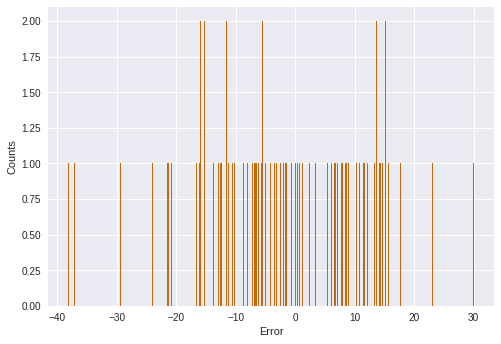

In [40]:

#error plot --> gaussian distribution 

def errorPlot(preds, labels, counts):
  errors = preds - labels
  plt.hist(errors, counts)
  plt.xlabel('Error')
  plt.ylabel('Counts')
  plt.show()

errorPlot(testPreds_Array, testLabels, numEpochs)

# Using Other models on the dataset

## Simple Linear Regression

In [41]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(trainFeatures, trainLabels)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [42]:
testPreds_LR = regressor.predict(testFeatures)
testPreds_LR_Array=testPreds_LR.flatten()   #Flattening to 1d array

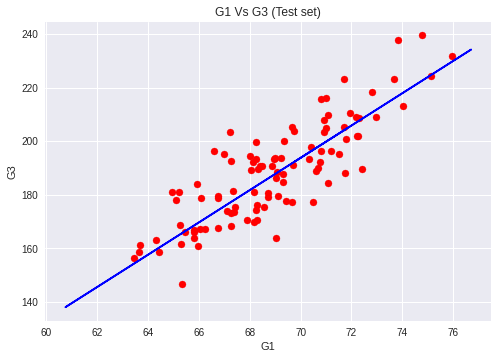

In [43]:
plt.grid(True)
plt.scatter(testFeatures, testLabels, color = 'red')
plt.plot(trainFeatures, regressor.predict(trainFeatures), color = 'blue')
plt.title('G1 Vs G3 (Test set)')
plt.xlabel('G1')
plt.ylabel('G3')
plt.show()

#Support Vector Machine

In [44]:
from sklearn.svm import SVR
SVM_regressor = SVR(kernel = 'rbf')
SVM_regressor.fit(trainFeatures, trainLabels)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [45]:
testPreds_SVM=SVM_regressor.predict(testFeatures)
testPreds_SVM_Array=testPreds_SVM.flatten()

In [46]:
CompareModels_df=pd.DataFrame({'testLabels':testLabels,'testPreds':testPreds_Array,'testPreds_LR':testPreds_LR_Array,'testPreds_SVM':testPreds_SVM_Array})
print(CompareModels_df.head(15))

    testLabels   testPreds  testPreds_LR  testPreds_SVM
9   156.399676  171.628052    154.261263     168.690299
25  192.343977  184.350632    182.534349     182.130680
28  175.213922  182.388885    178.174808     176.977416
31  212.910225  200.336212    218.058772     208.414757
32  195.032243  193.535721    202.946192     201.194730
38  163.851825  178.008469    168.440342     168.873780
39  163.108017  173.928802    159.374164     167.352368
42  168.617746  176.551071    165.201584     167.670971
47  209.070863  195.284958    206.833479     203.967716
53  181.407679  182.143509    177.629488     176.373930
57  192.124847  191.489929    198.399875     197.924805
70  184.595608  187.459610    189.443343     190.168517
72  177.200929  188.475266    191.700438     192.425933
82  237.916736  199.772552    216.806138     208.446641
84  160.683917  178.421738    169.358717     169.357372


In [47]:
Errors_df=pd.DataFrame({'PerceptronError':abs(testLabels-testPreds_Array),'LR_Error':abs(testLabels-testPreds_LR_Array),'SVM_Error':abs(testLabels-testPreds_SVM_Array)})
print(Errors_df.head(15))

    PerceptronError   LR_Error  SVM_Error
9         15.228375   2.138414  12.290623
25         7.993345   9.809627  10.213297
28         7.174963   2.960886   1.763494
31        12.574013   5.148547   4.495468
32         1.496522   7.913949   6.162487
38        14.156644   4.588517   5.021956
39        10.820785   3.733853   4.244350
42         7.933325   3.416162   0.946775
47        13.785906   2.237385   5.103148
53         0.735830   3.778192   5.033750
57         0.634918   6.275028   5.799957
70         2.864002   4.847734   5.572909
72        11.274337  14.499509  15.225004
82        38.144183  21.110598  29.470095
84        17.737821   8.674801   8.673456


# Rsquared test

In [48]:
r2_score_LR=regressor.score(testFeatures,testLabels)
print(r2_score_LR*100)

69.894516942171


In [49]:
r2_score_SVM=SVM_regressor.score(testFeatures,testLabels)
print(r2_score_SVM*100)

61.22648934303421


` The model is performing well on Simple Linear Regression then SVM`

``` Predicting the target value with a single feature is insufficient and the loss is too high which can't be minimized in anyway ```
###### Multiple Features are must to train a good model. Hence on the above dataset I can't find anything that I can Improve.